In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
ROOT = 'data'
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))
print(CLASS_NAME)

['African_crocodile', 'American_egret', 'Doberman', 'Lakeland_terrier', 'Orange_easy', 'Rhodesian_ridgeback', 'ambulance', 'apiary', 'bannister', 'barn_spider', 'basketball', 'black_widow', 'brain_coral', 'bullet_train', 'can_opener', 'capuchin', 'car_mirror', 'carousel', 'castle', 'china_cabinet', 'cliff_dwelling', 'comic_book', 'conch', 'cornet', 'dugong', 'electric_locomotive', 'flamingo', 'flatworm', 'goldfish', 'grocery_store', 'guillotine', 'half_track', 'hen-of-the-woods', 'horizontal_bar', 'killer_whale', 'kit_fox', 'knee_pad', 'lion', 'loudspeaker', 'lynx', 'magpie', 'meat_loaf', 'mixing_bowl', 'parachute', 'pizza', 'ram', 'red-backed_sandpiper', 'ruffed_grouse', 'safety_pin', 'scabbard', 'screen', 'steam_locomotive', 'steel_arch_bridge', 'theater_curtain', 'traffic_light', 'triceratops', 'vine_snake', 'warplane', 'white_stork', 'yawl']


In [4]:
def read_image_from_path(path,size):
    im = Image.open(path).convert('RGB').resize(size)
    return np.array(im)

def folder_to_images(folder, size):
    list_dir = [folder + '/' + name for name in os.listdir(folder)]
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []
    for i, path in enumerate(list_dir):
        images_np[i] = read_image_from_path(path, size)
        images_path.append(path)
    images_path = np.array(images_path)
    return images_np, images_path

In [5]:
def absolute_difference(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    return np.sum(np.abs(data-query),axis = axis_batch_size)

In [6]:
def get_l1_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)  # mảng numpy nhiều ảnh, paths
            rates = absolute_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score


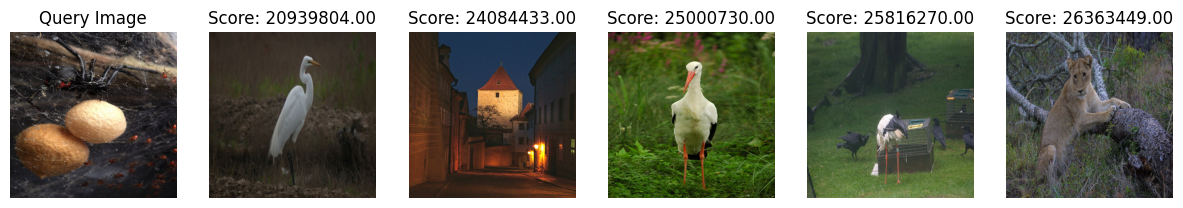

In [10]:
def plot_results(query_path, ls_path_score, reverse=False):
    # Đọc ảnh truy vấn
    query_img = read_image_from_path(query_path, size)
    
    # Sắp xếp kết quả theo điểm số
    ls_path_score = sorted(ls_path_score, key=lambda x: x[1], reverse=reverse)
    
    # Lấy đường dẫn ảnh và điểm số
    img_paths, scores = zip(*ls_path_score)
    
    # Vẽ ảnh truy vấn
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 6, 1)
    plt.imshow(query_img)
    plt.title('Query Image')
    plt.axis('off')
    
    # Vẽ các ảnh kết quả
    for i, img_path in enumerate(img_paths[:5]):  # Hiển thị 5 ảnh kết quả đầu tiên
        result_img = read_image_from_path(img_path, size)
        plt.subplot(1, 6, i + 2)
        plt.imshow(result_img)
        plt.title(f'Score: {scores[i]:.2f}')
        plt.axis('off')
    
    plt.show()

root_img_path = f"{ROOT}/train/"
query_path = "data/test/black_widow/n01774384_10073.JPEG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)




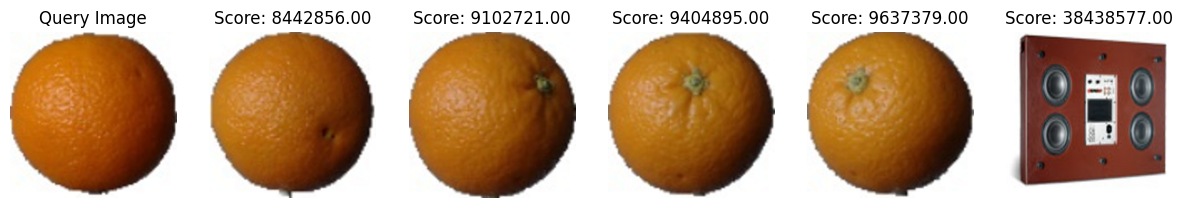

In [11]:
root_img_path = f"{ROOT}/train/"
query_path = "data/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [15]:
def mean_square_difference(query,data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    return np.sqrt(np.sum((data-query)**2,axis = axis_batch_size))

In [18]:
def get_l2_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)  # mảng numpy nhiều ảnh, paths
            rates = mean_square_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score


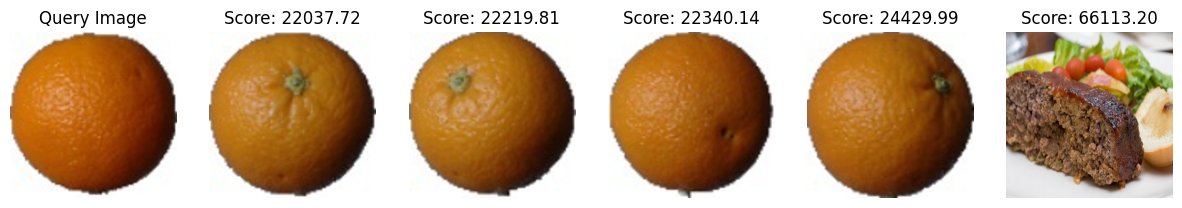

In [19]:
root_img_path = f"{ROOT}/train/"
query_path = "data/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [20]:
def cosine_similarity(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    query_norm = np.sqrt(np.sum(query**2))
    data_norm = np.sqrt(np.sum(data**2, axis=axis_batch_size))
    return np.sum(data * query, axis=axis_batch_size) / (query_norm * data_norm + np.finfo(float).eps)


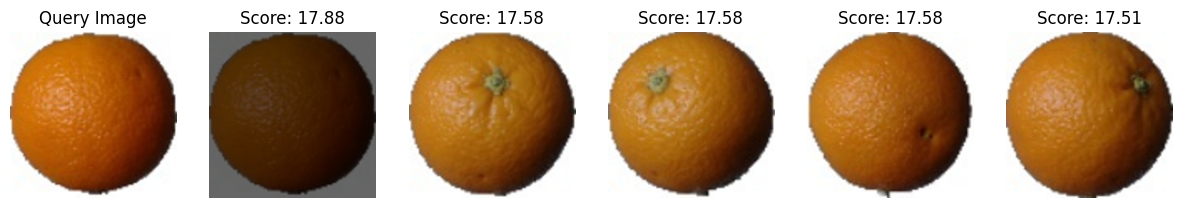

In [21]:
def get_cosine_similarity_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)  # mảng numpy nhiều ảnh, paths
            rates = cosine_similarity(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score


root_img_path = f"{ROOT}/train/"
query_path = "data/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

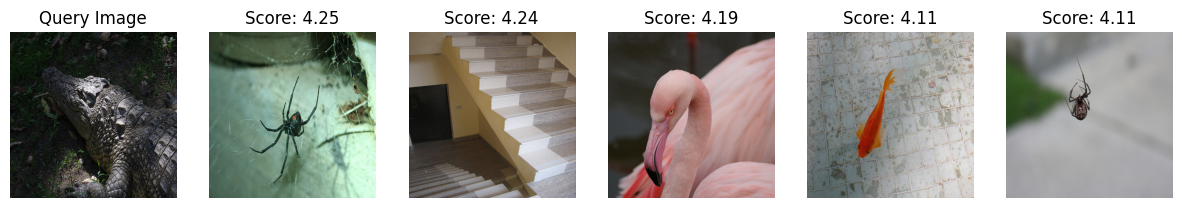

In [22]:
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

In [23]:
def correlation_coefficient(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    query_mean = query - np.mean(query)
    data_mean = data - np.mean(data, axis=axis_batch_size, keepdims=True)
    query_norm = np.sqrt(np.sum(query_mean**2))
    data_norm = np.sqrt(np.sum(data_mean**2, axis=axis_batch_size))
    return np.sum(data_mean * query_mean, axis=axis_batch_size) / (query_norm * data_norm + np.finfo(float).eps)

In [24]:
def get_correlation_coefficient_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)  # mảng numpy nhiều ảnh, paths
            rates = correlation_coefficient(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score


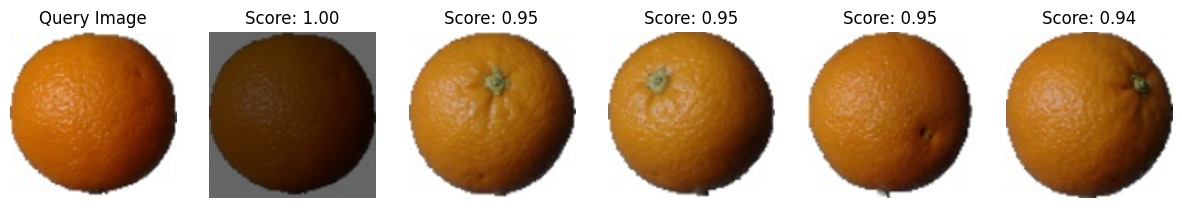

In [26]:
root_img_path = f"{ROOT}/train/"
query_path = "data/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

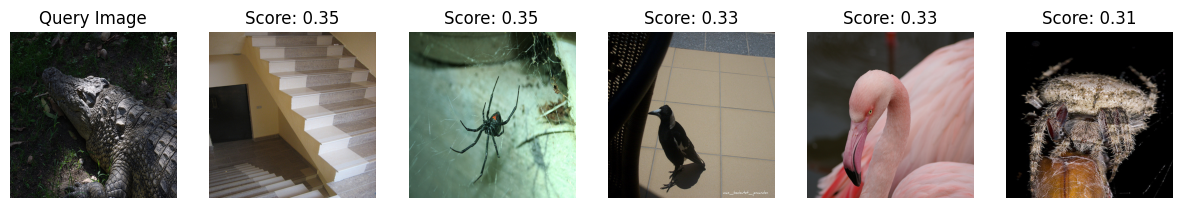

In [27]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)